# LabOne-Exploring_Table_Data - Rupal Sanghavi, Omar Roa

This dataset contains information regarding crimes, excluding murders, in the City of Chicago. The attributes contained in the dataset can be grouped into a few categories. These categories are location (Block, Beat, District, Ward, Community Area, Latitude, Longitude, X Coordinate, Y Coordinate, Location, Community Area), Crime Properties (Primary Type, Description, Location Description, Domestic, Arrest), Organizational (IUCR, Case Number, FBI Code, Updated On, Year, Date, ID).

The data itself was provided by the Research & Development Division of the Chicago Police Department but was downloaded via 
https://www.kaggle.com/currie32/crimes-in-chicago This data is important as it could help potentially help in a few areas.

We have an abundance of location and date/time information. This alone can allow us to see patterns in where and when crime happened. Types of crime can also be useful. Awareness of types of crime per ward can help 

1) Help predict crime. Although crime prediction is still inaccurate, there have been new methods created such as PredPol (http://www.predpol.com/). It has not been completely successful (see https://mic.com/articles/156286/crime-prediction-tool-pred-pol-only-amplifies-racially-biased-policing-study-shows#.suYnLauXH ). If we can find meaningful relationships with our data, perhaps we can help predict summer crime in Chicago.

2) Demonstrate areas that may be in need of community involvement (or increase) . With our data, perhaps we can convince city hall to invest more into violence reduction programs (http://www.ncpc.org/topics/violent-crime-and-personal-safety/strategies/strategy-gang-prevention-through-community-intervention-with-high-risk-youth).

The attributes we used  were Date, Primary Type,Beat,Community Area,Ward,Latitude,Arrest, Date, Day_in_month, month, year, and Ward. These were all type String except for Latitude and Ward which are Floats and Arrest which was a bool. The Beat is the smallest police geographic area and the ward is the City Council District where the incident occurred.

We chose elimination for the missing values in this dataset because upon analysis, we saw that when there was a row containing a missing value, all the other values in the columns in that row would also be missing values (except in a few cases Location and Location Description). The Location and Location Description attributes for those rows removed did not affect us because we are not using them in any of our visuals.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=",")

df = df.drop(['Unnamed: 0', 'X Coordinate', 'Y Coordinate'], 1) #unsed columns


In [47]:
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
col_deleted = list( set(df.columns) - set(df_imputed.columns)) # in case the median operation deleted columns
df_imputed[col_deleted] = df[col_deleted]


In [4]:
sum(df.Arrest==1)/len(df)*100.0

25.912567600778193

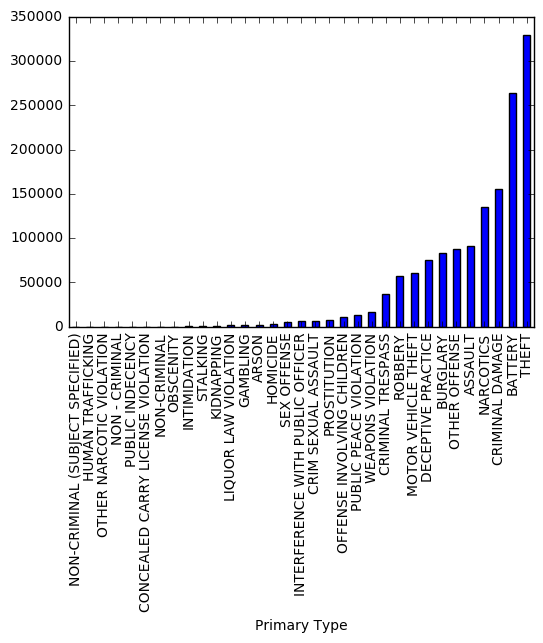

In [5]:
#for __ description, # of arrests
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
# df["Primary Type"].describe()
# df.info()
arrests.sort_values(inplace=True)
ax = arrests.plot(kind = 'bar')

In this graph, it is evident that the three top crimes committed in Chicago from 2007-2014 that resulted in arrests were of Theft, Battery, and Criminal Damage.

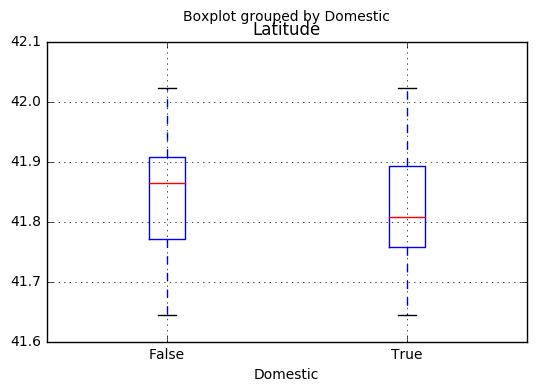

In [6]:
ax = df.boxplot(column='Latitude', by = 'Domestic') # group by class
ax.set_ybound(41.6,42.1)

This boxplot shows show that the crimes committed in the southern areas more often were domestic crimes. 

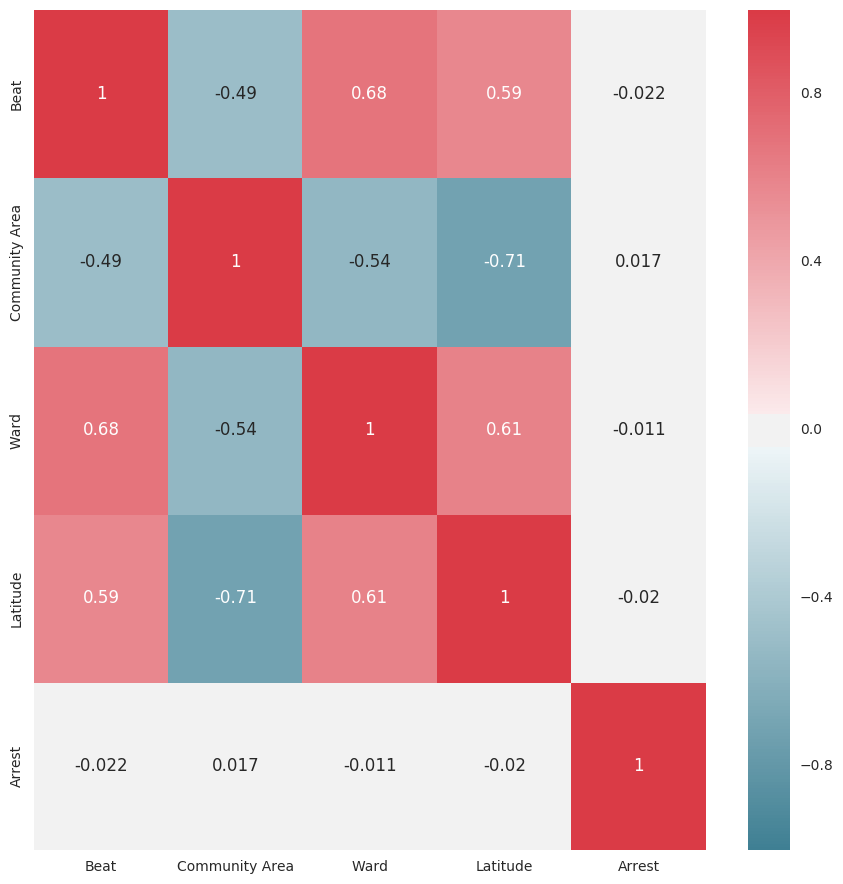

In [20]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(9, 9))
# df_grouped = df.groupby(by=['Primary Type'])
df_sub = df[['Beat','Community Area','Ward','Latitude','Arrest']]

sns.heatmap(df_sub.corr(), cmap=cmap, annot=True)
f.tight_layout()

This histogram shows that there is a very low correlation between the location of the crime and whether it resulted in an arrest.

In [14]:
#Tokenizing the Date attribute 
tokens = [x.split() for x in df['Date'].values ]
days = [x[0] for x in tokens]
datestokens = [x.split("/") for x in days]
day_in_month = [x[1] for x in datestokens]
month = [x[0] for x in datestokens]
year = [x[2] for x in datestokens]

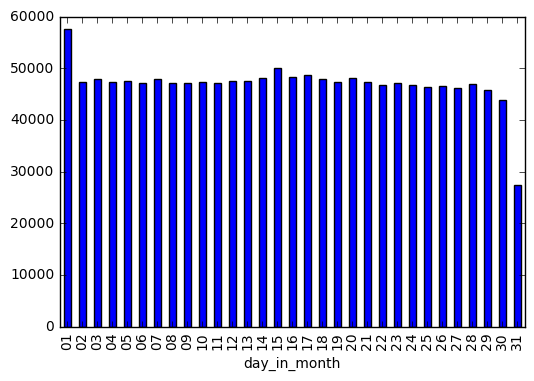

In [16]:
df['day_in_month'] = day_in_month
df['month'] = month
df['year'] = year
grouped = df.groupby(by="day_in_month")
blah = grouped.Arrest.count()
ax = blah.plot(kind = 'bar')

This bar graph shows that the number of arrests resulting from a crime declined towards the end of each month.

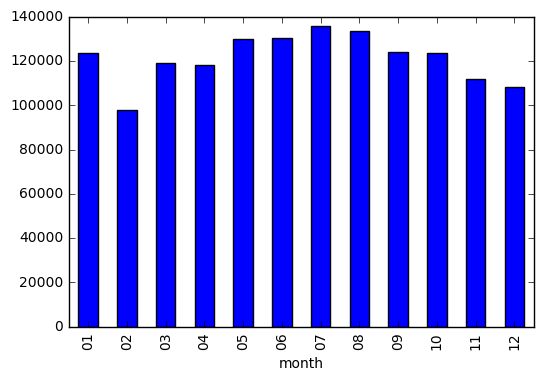

In [38]:
grouped = df.groupby(by="month")
month_arrests = grouped.Arrest.count()
ax = month_arrests.plot(kind = 'bar')


This bar graph shows that the number of arrests resulting from a crime plummeted during colder times of the year such as February. 

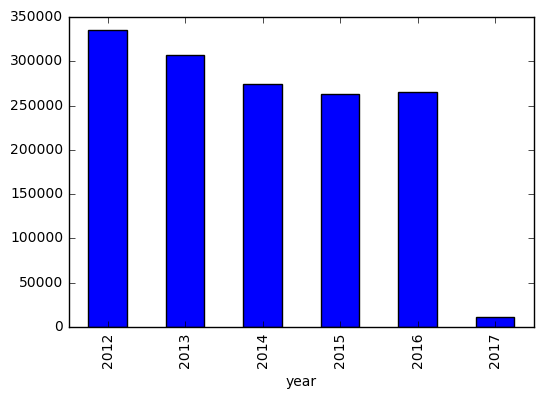

In [37]:
grouped = df.groupby(by="year")
year_arrests = grouped.Arrest.count()
ax = year_arrests.plot(kind = 'bar')

This bar graph demonstrates the decline of arrests resulting from a crime as the years progress.

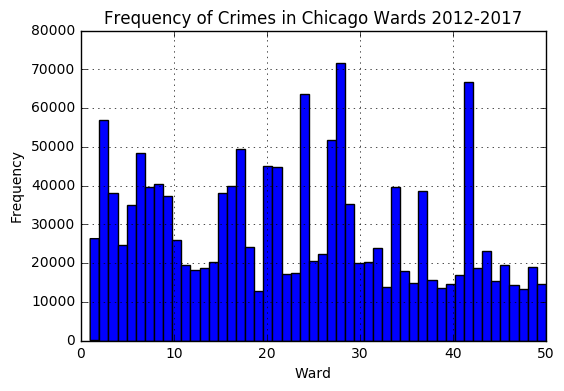

In [14]:
df['Ward'].hist(bins=50, grid=True)
plt.title("Frequency of Crimes in Chicago Wards 2012-2017")
plt.xlabel("Ward")
plt.ylabel("Frequency")

This histogram shows the number of crimes that happened per ward (wards are divisions in the city) throughout 2012 and 2017.  There are 50 wards in Chicago, hence 50 bins for the histogram.

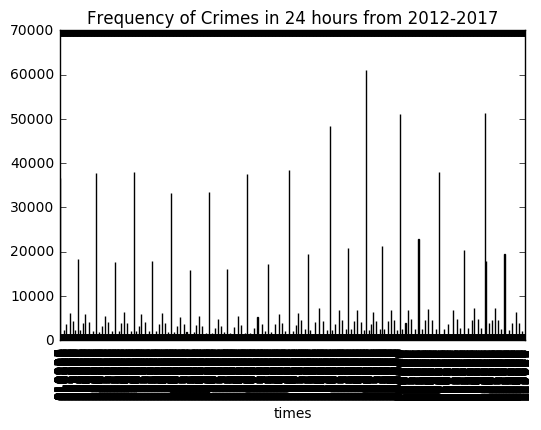

In [41]:
times = [x[1] for x in tokens]
timesWithOutColon =[time.replace(":" , "") for time in times]
df['times'] = timesWithOutColon
grouped_time = df.groupby(by="times")
blah = grouped_time.Arrest.count()
ax = blah.plot(kind = 'bar', title="Frequency of Crimes in 24 hours from 2012-2017")


This bar graph shows frequency of times during a 24 hour period. We removed the colon from the time string, so time values are large (i.e. 24:00:00 = 240000). The tallest bars show that more crimes are happened in the afternoon and late night.